# Amazon employee reviews  

In this project, we will explore the idea of using employee reviews to determine  
the probability of an employee leaving the company or not, so HR can act accordingly.  

The prediction of whether an employee leaves the company will be done using   
logistic regression and the project will be carried out in different stages:  
1. Exploratory Data Analysis  
2. Model training, evaluation and selection  
3. Model deployment  





## Dataset  
The dataset was obtained from Kaggle and can be found here:  
https://www.kaggle.com/datasets/nikhilraj7700/amazon-employee-reviews  

From the reference, the variable descriptions are:  
Index: An exclusive identifier for each individual review entry.

* **Name:** The job title or role of the employee providing the review.  
* **Place:** The geographical location or city where the employee works.  
* **Job Type:** The employment status of the reviewer (e.g., Full Time).  
* **Department:** The specific department or functional area within the organization.  
* **Date:** The date when the review was submitted.  
* **Overall Rating:** A numerical rating given by the employee for their overall job satisfaction.  
* **Work Life Balance:** Rating indicating the work-life balance experienced by the employee.  
* **Skill Development:** Rating reflecting the opportunities for skill enhancement and growth.  
* **Salary and Benefits:** Rating assessing the satisfaction with compensation and benefits.  
* **Job Security:** Rating expressing the employee's sense of job security.  
* **Career Growth:** Rating indicating the perceived career advancement opportunities.  
* **Work Satisfaction:** Rating showcasing the employee's contentment with their work.  
* **Likes:** Positive aspects and pros highlighted by the employee in their review.  
* **Dislikes:** Negative aspects and cons mentioned by the employee in their review.  

## Exploratory Data Analysis

**Data importing**

In [5]:
import pandas as pd

In [35]:
original_df = pd.read_csv("./data/Amazon_Reviews.csv")

In [51]:
df = original_df.copy()

**Basic info**

In [48]:
# Basic info  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 9990 non-null   object 
 1   Place                7992 non-null   object 
 2   Job_type             9990 non-null   object 
 3   Department           9990 non-null   object 
 4   Date                 9990 non-null   object 
 5   Overall_rating       9990 non-null   float64
 6   work_life_balance    9990 non-null   float64
 7   skill_development    9990 non-null   float64
 8   salary_and_benefits  9990 non-null   float64
 9   job_security         9990 non-null   float64
 10  career_growth        9990 non-null   float64
 11  work_satisfaction    9990 non-null   float64
 12  Likes                9990 non-null   object 
 13  Dislikes             9990 non-null   object 
dtypes: float64(7), object(7)
memory usage: 1.1+ MB


In [52]:
# first values
df.head(3)

,Name,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Software Development Engineer,Hyderabad/Secunderabad,Full Time,Software Development Department,8 Aug 2023,2.0,1.0,2.0,5.0,1.0,3.0,3.0,The office is great and you have best in indus...,Worst work life balance.\nThe managers have to...
1,Dls Case Specialist II HR Assistant,Hyderabad/Secunderabad,Full Time,HR Operations Department,8 Aug 2023,1.0,5.0,1.0,3.0,1.0,2.0,1.0,Good work life balance and team building exerc...,No job security. They will cut you out any-day...
2,Customer Support Associate (working remotely),NaN,Full Time,Customer Success Department,8 Aug 2023,1.0,2.0,1.0,2.0,1.0,2.0,3.0,"good about this company, provides virtual roles","this company is really bad , no job security ,..."


We can see at a glance that:  
+ "Place" has null values
+ "Likes" and "Dislikes" are natural language, well suited for NLP analysis, which is not our case
+ "Date" is not of interest for this analysis
+ "Name", "Place", "Job_type", and "Department" are categorical variables, so we need to see how many occurrences are of each type
+ We will use "overall_rating" as the dependant variable, assuming that its score reflects the possibility of the employee leaving the company. Overall, this number reflects how happy is the employee, and the more *unhappy* the more likely to leave the company.  

In the next section, we will clean the dataset addressing null values, number of occurrences for categorical variables and establish consistency across names in the columns and the text content.

**Null values**

In [53]:
#fill null values with an "Unknown" category
df["Place"] = df["Place"].fillna("Unknown")
df.head(3)

,Name,Place,Job_type,Department,Date,Overall_rating,work_life_balance,skill_development,salary_and_benefits,job_security,career_growth,work_satisfaction,Likes,Dislikes
0,Software Development Engineer,Hyderabad/Secunderabad,Full Time,Software Development Department,8 Aug 2023,2.0,1.0,2.0,5.0,1.0,3.0,3.0,The office is great and you have best in indus...,Worst work life balance.\nThe managers have to...
1,Dls Case Specialist II HR Assistant,Hyderabad/Secunderabad,Full Time,HR Operations Department,8 Aug 2023,1.0,5.0,1.0,3.0,1.0,2.0,1.0,Good work life balance and team building exerc...,No job security. They will cut you out any-day...
2,Customer Support Associate (working remotely),Unknown,Full Time,Customer Success Department,8 Aug 2023,1.0,2.0,1.0,2.0,1.0,2.0,3.0,"good about this company, provides virtual roles","this company is really bad , no job security ,..."


**Column names**

In [54]:
df.columns = [c.upper() for c in df.columns]
df.columns

Index(['NAME', 'PLACE', 'JOB_TYPE', 'DEPARTMENT', 'DATE', 'OVERALL_RATING',
       'WORK_LIFE_BALANCE', 'SKILL_DEVELOPMENT', 'SALARY_AND_BENEFITS',
       'JOB_SECURITY', 'CAREER_GROWTH', 'WORK_SATISFACTION', 'LIKES',
       'DISLIKES'],
      dtype='object')

In [55]:
# keep selected columns
df.drop(columns = ["LIKES", "DISLIKES", "DATE"], inplace=True)
df.rename(columns = {"NAME":"POSITION"}, inplace=True)
df.head(3)

,POSITION,PLACE,JOB_TYPE,DEPARTMENT,OVERALL_RATING,WORK_LIFE_BALANCE,SKILL_DEVELOPMENT,SALARY_AND_BENEFITS,JOB_SECURITY,CAREER_GROWTH,WORK_SATISFACTION
0,Software Development Engineer,Hyderabad/Secunderabad,Full Time,Software Development Department,2.0,1.0,2.0,5.0,1.0,3.0,3.0
1,Dls Case Specialist II HR Assistant,Hyderabad/Secunderabad,Full Time,HR Operations Department,1.0,5.0,1.0,3.0,1.0,2.0,1.0
2,Customer Support Associate (working remotely),Unknown,Full Time,Customer Success Department,1.0,2.0,1.0,2.0,1.0,2.0,3.0


**Categorical and non-categorical variables**

In [56]:
df.columns

Index(['POSITION', 'PLACE', 'JOB_TYPE', 'DEPARTMENT', 'OVERALL_RATING',
       'WORK_LIFE_BALANCE', 'SKILL_DEVELOPMENT', 'SALARY_AND_BENEFITS',
       'JOB_SECURITY', 'CAREER_GROWTH', 'WORK_SATISFACTION'],
      dtype='object')

In [57]:
categorical_variables = []
numerical_variables = []
for c in df.columns:
    if df[c].dtype=="O":
        categorical_variables.append(c)
    else:
        numerical_variables.append(c)

In [58]:
categorical_variables

['POSITION', 'PLACE', 'JOB_TYPE', 'DEPARTMENT']

In [59]:
numerical_variables

['OVERALL_RATING',
 'WORK_LIFE_BALANCE',
 'SKILL_DEVELOPMENT',
 'SALARY_AND_BENEFITS',
 'JOB_SECURITY',
 'CAREER_GROWTH',
 'WORK_SATISFACTION']

**Unique values**

In [60]:
#unique values
for c in df.columns: 
    print(f"{c}: ", len(df[c].unique()))

POSITION:  10
PLACE:  7
JOB_TYPE:  1
DEPARTMENT:  8
OVERALL_RATING:  5
WORK_LIFE_BALANCE:  5
SKILL_DEVELOPMENT:  5
SALARY_AND_BENEFITS:  4
JOB_SECURITY:  5
CAREER_GROWTH:  5
WORK_SATISFACTION:  4


In [11]:
# We can see that "JOB_TYPE" as 1 unique value, which means that the dataset
# corresponds to only one type of job, so we should drop it

In [61]:
for c in df.columns:
    unique_values = df[c].unique()
    print(f"\n -- {len(unique_values)} unique values for {c}: \n{unique_values}")


 -- 10 unique values for POSITION: 
['Software Development Engineer' 'Dls Case Specialist II HR Assistant'
 'Customer Support Associate   (working remotely)'
 'Sds Associate   (working remotely)' 'Software Developer'
 'Senior Associate -Supply Chain Operations-forecast And Operational Planning'
 'Regional Manager Ehs' 'Associate Executive' 'Process Associate'
 'Manager']

 -- 7 unique values for PLACE: 
['Hyderabad/Secunderabad' 'Unknown' 'Bengaluru/Bangalore, Karnataka'
 'Bengaluru/Bangalore' 'New Delhi' 'Noida' 'Raipur, Chhattisgarh']

 -- 1 unique values for JOB_TYPE: 
['Full Time']

 -- 8 unique values for DEPARTMENT: 
['Software Development Department' 'HR Operations Department'
 'Customer Success Department' 'Non Voice Department'
 'Operations Department' 'Occupational Health & Safety Department'
 'Voice / Blended Department' 'Policy Department']

 -- 5 unique values for OVERALL_RATING: 
[2. 1. 4. 3. 5.]

 -- 5 unique values for WORK_LIFE_BALANCE: 
[1. 5. 2. 3. 4.]

 -- 5 unique

In [62]:
# value counts: how many occurrences of each type in each category
for c in df.columns:
    print(f"{df[c].value_counts()} \n")

POSITION
Software Development Engineer                                                  999
Dls Case Specialist II HR Assistant                                            999
Customer Support Associate   (working remotely)                                999
Sds Associate   (working remotely)                                             999
Software Developer                                                             999
Senior Associate -Supply Chain Operations-forecast And Operational Planning    999
Regional Manager Ehs                                                           999
Associate Executive                                                            999
Process Associate                                                              999
Manager                                                                        999
Name: count, dtype: int64 

PLACE
Hyderabad/Secunderabad            1998
Unknown                           1998
New Delhi                         1998
Bengaluru/

In [63]:
#  As noted before, "JOB_TYPE" has one unique value, so no point in using this as a variable that has an impact
df.drop(columns = ["JOB_TYPE"], inplace=True)

In [64]:
categorical_variables.remove("JOB_TYPE")
categorical_variables

['POSITION', 'PLACE', 'DEPARTMENT']

**Distribution**

In [16]:
from matplotlib import pyplot as plt

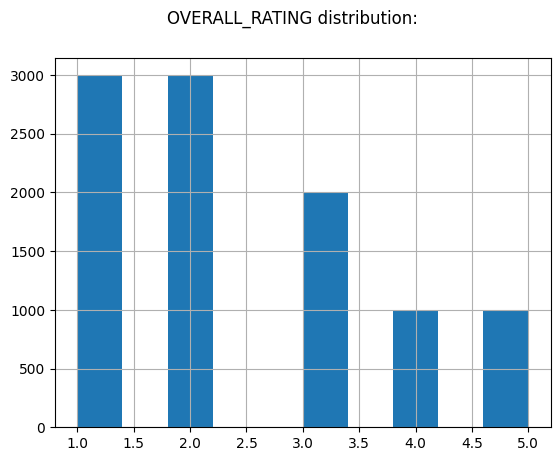

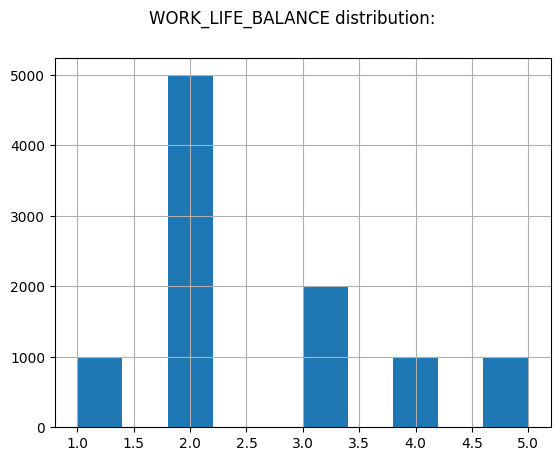

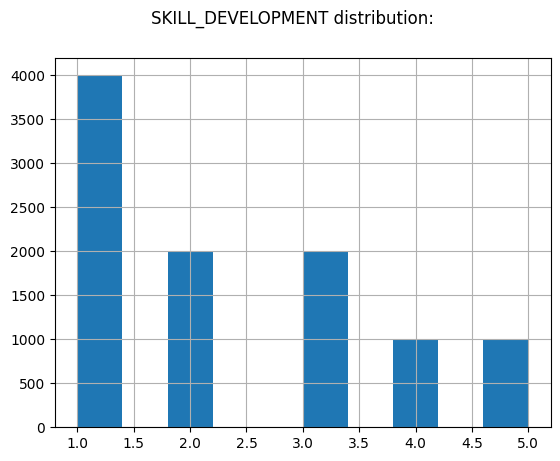

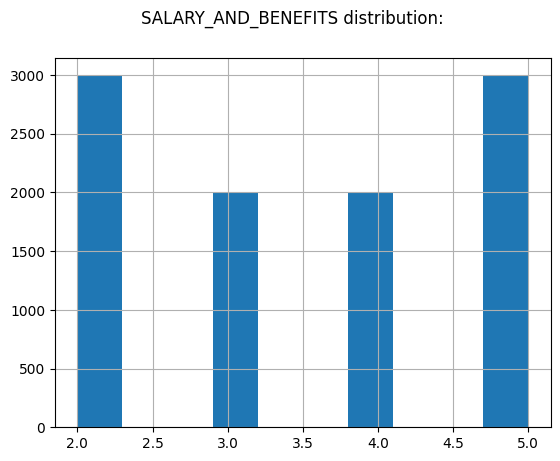

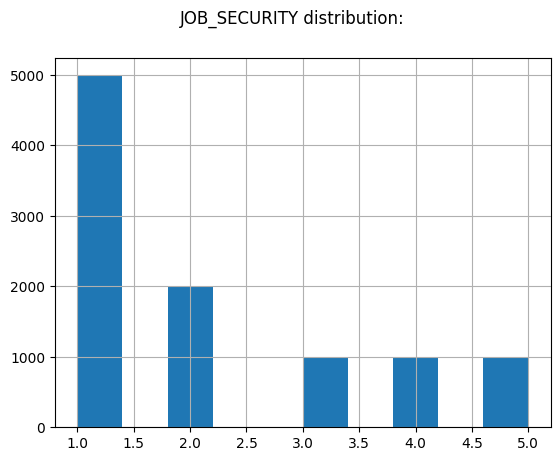

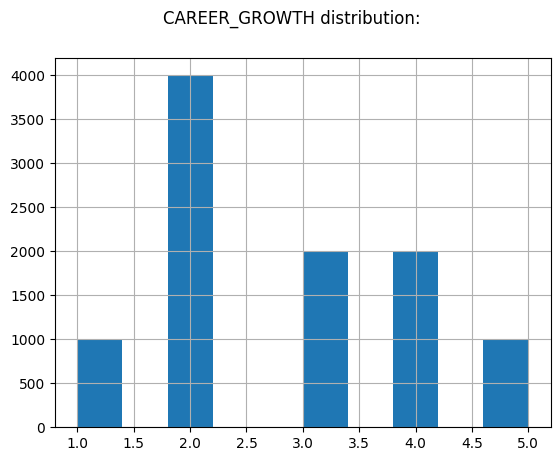

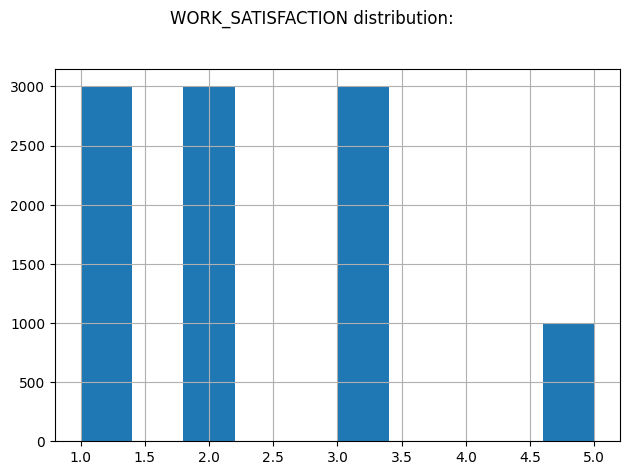

In [65]:
# value distribution
for c in numerical_variables:
    title = f"{c} distribution: \n"
    fig = plt.figure()
    df[c].hist()
    fig.suptitle(title)

plt.tight_layout()
plt.show()

In [66]:
# security distribution
df.JOB_SECURITY.value_counts()

JOB_SECURITY
1.0    4995
2.0    1998
3.0     999
4.0     999
5.0     999
Name: count, dtype: int64

## Target variable  
We will use the overall rating as an indicator that the employee es happy or not

In [67]:
df["OVERALL_RATING"].value_counts()

OVERALL_RATING
2.0    2997
1.0    2997
3.0    1998
4.0     999
5.0     999
Name: count, dtype: int64

In [68]:
df["IS_HAPPY"] = (df["OVERALL_RATING"]>=3.0).astype(int)
df.head(3)

,POSITION,PLACE,DEPARTMENT,OVERALL_RATING,WORK_LIFE_BALANCE,SKILL_DEVELOPMENT,SALARY_AND_BENEFITS,JOB_SECURITY,CAREER_GROWTH,WORK_SATISFACTION,IS_HAPPY
0,Software Development Engineer,Hyderabad/Secunderabad,Software Development Department,2.0,1.0,2.0,5.0,1.0,3.0,3.0,0
1,Dls Case Specialist II HR Assistant,Hyderabad/Secunderabad,HR Operations Department,1.0,5.0,1.0,3.0,1.0,2.0,1.0,0
2,Customer Support Associate (working remotely),Unknown,Customer Success Department,1.0,2.0,1.0,2.0,1.0,2.0,3.0,0


## Class distribution

In [69]:
## How many employees are happy/unhappy?
df["IS_HAPPY"].value_counts(normalize = True)

IS_HAPPY
0    0.6
1    0.4
Name: proportion, dtype: float64

In [23]:
# This is a slightly imbalanced class distribution, but we will see if this
# needs some adjustment to improve performance

## Train-test split

In [24]:
from sklearn.model_selection import train_test_split

In [70]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [71]:
len(df_train), len(df_val), len(df_test)

(5994, 1998, 1998)

In [72]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [75]:
df_train["IS_HAPPY"].value_counts()

IS_HAPPY
0    3597
1    2397
Name: count, dtype: int64

In [76]:
y_train = df_train.IS_HAPPY.values
y_val = df_val.IS_HAPPY.values
y_test = df_test.IS_HAPPY.values

df_train.drop(columns = ['OVERALL_RATING',"IS_HAPPY"], inplace=True)
df_val.drop(columns = ['OVERALL_RATING',"IS_HAPPY"], inplace=True)
df_test.drop(columns = ['OVERALL_RATING',"IS_HAPPY"], inplace=True)

In [77]:
df_train.head(3)

,POSITION,PLACE,DEPARTMENT,WORK_LIFE_BALANCE,SKILL_DEVELOPMENT,SALARY_AND_BENEFITS,JOB_SECURITY,CAREER_GROWTH,WORK_SATISFACTION
0,Associate Executive,Noida,Customer Success Department,2.0,1.0,2.0,1.0,1.0,1.0
1,Software Development Engineer,Hyderabad/Secunderabad,Software Development Department,1.0,2.0,5.0,1.0,3.0,3.0
2,Dls Case Specialist II HR Assistant,Hyderabad/Secunderabad,HR Operations Department,5.0,1.0,3.0,1.0,2.0,1.0


In [78]:
numerical_variables.remove("OVERALL_RATING")
numerical_variables

['WORK_LIFE_BALANCE',
 'SKILL_DEVELOPMENT',
 'SALARY_AND_BENEFITS',
 'JOB_SECURITY',
 'CAREER_GROWTH',
 'WORK_SATISFACTION']

## One-hot encoding using DictVectorizer

In [79]:
from sklearn.feature_extraction import DictVectorizer

In [128]:
df_train.head(3)

,POSITION,PLACE,DEPARTMENT,WORK_LIFE_BALANCE,SKILL_DEVELOPMENT,SALARY_AND_BENEFITS,JOB_SECURITY,CAREER_GROWTH,WORK_SATISFACTION
0,Associate Executive,Noida,Customer Success Department,2.0,1.0,2.0,1.0,1.0,1.0
1,Software Development Engineer,Hyderabad/Secunderabad,Software Development Department,1.0,2.0,5.0,1.0,3.0,3.0
2,Dls Case Specialist II HR Assistant,Hyderabad/Secunderabad,HR Operations Department,5.0,1.0,3.0,1.0,2.0,1.0


In [127]:
df_train.columns

Index(['POSITION', 'PLACE', 'DEPARTMENT', 'WORK_LIFE_BALANCE',
       'SKILL_DEVELOPMENT', 'SALARY_AND_BENEFITS', 'JOB_SECURITY',
       'CAREER_GROWTH', 'WORK_SATISFACTION'],
      dtype='object')

In [130]:
categorical_variables + numerical_variables

['POSITION',
 'PLACE',
 'DEPARTMENT',
 'WORK_LIFE_BALANCE',
 'SKILL_DEVELOPMENT',
 'SALARY_AND_BENEFITS',
 'JOB_SECURITY',
 'CAREER_GROWTH',
 'WORK_SATISFACTION']

In [131]:
train_dicts = df_train.to_dict(orient="records")

In [136]:
train_dicts[:2]

[{'POSITION': 'Associate Executive',
  'PLACE': 'Noida',
  'DEPARTMENT': 'Customer Success Department',
  'WORK_LIFE_BALANCE': 2.0,
  'SKILL_DEVELOPMENT': 1.0,
  'SALARY_AND_BENEFITS': 2.0,
  'JOB_SECURITY': 1.0,
  'CAREER_GROWTH': 1.0,
  'WORK_SATISFACTION': 1.0},
 {'POSITION': 'Software Development Engineer',
  'PLACE': 'Hyderabad/Secunderabad',
  'DEPARTMENT': 'Software Development Department',
  'WORK_LIFE_BALANCE': 1.0,
  'SKILL_DEVELOPMENT': 2.0,
  'SALARY_AND_BENEFITS': 5.0,
  'JOB_SECURITY': 1.0,
  'CAREER_GROWTH': 3.0,
  'WORK_SATISFACTION': 3.0}]

In [137]:
dv = DictVectorizer(sparse=False)

In [138]:
dv.fit(train_dicts)

DictVectorizer(sparse=False)

In [139]:
dv.transform(train_dicts)

array([[1., 1., 0., ..., 1., 2., 1.],
       [3., 0., 0., ..., 2., 1., 3.],
       [2., 0., 1., ..., 1., 5., 1.],
       ...,
       [1., 1., 0., ..., 1., 2., 1.],
       [2., 0., 0., ..., 2., 3., 2.],
       [4., 0., 0., ..., 1., 2., 1.]])

In [140]:
dv.get_feature_names_out()

array(['CAREER_GROWTH', 'DEPARTMENT=Customer Success Department',
       'DEPARTMENT=HR Operations Department',
       'DEPARTMENT=Non Voice Department',
       'DEPARTMENT=Occupational Health & Safety Department',
       'DEPARTMENT=Operations Department', 'DEPARTMENT=Policy Department',
       'DEPARTMENT=Software Development Department',
       'DEPARTMENT=Voice / Blended Department', 'JOB_SECURITY',
       'PLACE=Bengaluru/Bangalore',
       'PLACE=Bengaluru/Bangalore, Karnataka',
       'PLACE=Hyderabad/Secunderabad', 'PLACE=New Delhi', 'PLACE=Noida',
       'PLACE=Raipur, Chhattisgarh', 'PLACE=Unknown',
       'POSITION=Associate Executive',
       'POSITION=Customer Support Associate   (working remotely)',
       'POSITION=Dls Case Specialist II HR Assistant', 'POSITION=Manager',
       'POSITION=Process Associate', 'POSITION=Regional Manager Ehs',
       'POSITION=Sds Associate   (working remotely)',
       'POSITION=Senior Associate -Supply Chain Operations-forecast And Operat

In [141]:
dv = DictVectorizer(sparse = False)

In [142]:
train_dict = df_train[categorical_variables + numerical_variables].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [143]:
val_dict = df_val[categorical_variables + numerical_variables].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [144]:
train_dict[:2]

[{'POSITION': 'Associate Executive',
  'PLACE': 'Noida',
  'DEPARTMENT': 'Customer Success Department',
  'WORK_LIFE_BALANCE': 2.0,
  'SKILL_DEVELOPMENT': 1.0,
  'SALARY_AND_BENEFITS': 2.0,
  'JOB_SECURITY': 1.0,
  'CAREER_GROWTH': 1.0,
  'WORK_SATISFACTION': 1.0},
 {'POSITION': 'Software Development Engineer',
  'PLACE': 'Hyderabad/Secunderabad',
  'DEPARTMENT': 'Software Development Department',
  'WORK_LIFE_BALANCE': 1.0,
  'SKILL_DEVELOPMENT': 2.0,
  'SALARY_AND_BENEFITS': 5.0,
  'JOB_SECURITY': 1.0,
  'CAREER_GROWTH': 3.0,
  'WORK_SATISFACTION': 3.0}]

In [145]:
(y_train==1).sum()/len(y_train)

0.3998998998998999

## Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression

In [240]:
model = LogisticRegression()
# solver='lbfgs' is the default solver in newer version of sklearn
# for older versions, you need to specify it explicitly
model.fit(X_train, y_train)

LogisticRegression()

In [241]:
print(f"y_train==1: {(y_train==1).sum()}")
print(f"y_train==0: {(y_train==0).sum()}")

y_train==1: 2397
y_train==0: 3597


In [242]:
model.intercept_[0]

-23.43477412043755

In [243]:
model.coef_[0].round(2)

array([ 2.61, -0.  , -0.3 , -0.14, -1.1 ,  0.66,  1.87, -1.01,  0.02,
        1.55,  0.66,  0.37, -1.68,  0.77, -0.  ,  0.02, -0.14, -0.  ,
       -0.  , -0.3 ,  1.87,  0.02, -1.1 , -0.14,  0.66,  0.37, -1.38,
        2.55,  1.22,  0.75, -1.3 ])

In [244]:
y_pred = model.predict_proba(X_val)[:, 1]

In [245]:
y_pred

array([4.88733946e-04, 2.87817948e-06, 9.99964840e-01, ...,
       4.88733946e-04, 9.99378760e-01, 9.99964840e-01])

In [246]:
is_happy_decision = (y_pred >= 0.5)

In [247]:
is_happy_decision

array([False, False,  True, ..., False,  True,  True])

In [248]:
(y_val == is_happy_decision).mean()

1.0

In [249]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = is_happy_decision.astype(int)
df_pred['actual'] = y_val

In [250]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [251]:
df_pred

,probability,prediction,actual,correct
0,0.000489,0,0,True
1,0.000003,0,0,True
2,0.999965,1,1,True
3,0.998899,1,1,True
4,0.000239,0,0,True
...,...,...,...,...
1993,0.999965,1,1,True
1994,0.001809,0,0,True
1995,0.000489,0,0,True
1996,0.999379,1,1,True


In [252]:
df_pred.correct.mean()

1.0

## Using the model  
We will first re-train the model but now using the complete full training set,   
which would be 80% of the total dataset

### Full train  (80%)

In [253]:
dicts_full_train = df_full_train[categorical_variables + numerical_variables].to_dict(orient='records')

In [254]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [255]:
y_full_train = df_full_train.IS_HAPPY.values

In [256]:
model = LogisticRegression(solver='lbfgs')
model.fit(X_full_train, y_full_train)

LogisticRegression()

### Test    (20%)

In [260]:
dicts_test = df_test[categorical_variables + numerical_variables].to_dict(orient='records')

In [261]:
X_test = dv.transform(dicts_test)

In [262]:
y_pred = model.predict_proba(X_test)[:, 1]

In [263]:
is_happy_decision = (y_pred >= 0.5)

In [273]:
is_happy_decision

array([False, False,  True, ...,  True, False,  True])

In [274]:
y_test

array([0, 0, 1, ..., 1, 0, 1])

In [264]:
(is_happy_decision == y_test).mean()

1.0

In [265]:
test_employee = dicts_test[-1]
test_employee

{'POSITION': 'Senior Associate -Supply Chain Operations-forecast And Operational Planning',
 'PLACE': 'Bengaluru/Bangalore',
 'DEPARTMENT': 'Operations Department',
 'WORK_LIFE_BALANCE': 2.0,
 'SKILL_DEVELOPMENT': 1.0,
 'SALARY_AND_BENEFITS': 4.0,
 'JOB_SECURITY': 4.0,
 'CAREER_GROWTH': 4.0,
 'WORK_SATISFACTION': 1.0}

In [266]:
X_small = dv.transform([test_employee])

In [267]:
model.predict_proba(X_small)[0, 1]

0.9991495616306835

In [268]:
y_test[-1]

1

## EVALUATION

### Accuracy and dummy model

In [275]:
len(y_test)

1998

In [276]:
(y_test ==1).sum()

790

In [277]:
(y_test ==0).sum()

1208

In [278]:
(y_test == is_happy_decision).mean()

1.0

In [190]:
from sklearn.metrics import accuracy_score

In [279]:
accuracy_score(y_test, y_pred >= 0.5)

1.0

In [192]:
import numpy as np

In [280]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_test, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.395
0.05 1.000
0.10 1.000
0.15 1.000
0.20 1.000
0.25 1.000
0.30 1.000
0.35 1.000
0.40 1.000
0.45 1.000
0.50 1.000
0.55 1.000
0.60 1.000
0.65 1.000
0.70 1.000
0.75 1.000
0.80 1.000
0.85 1.000
0.90 1.000
0.95 1.000
1.00 0.605


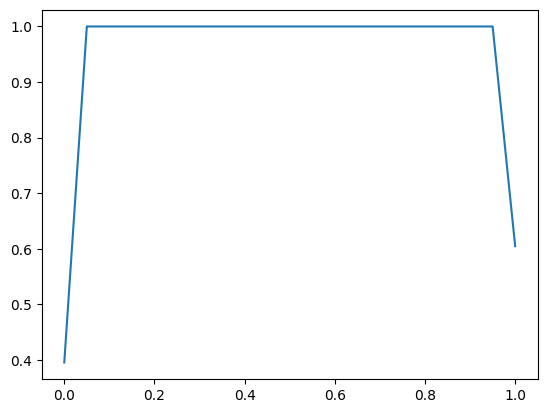

In [281]:
plt.plot(thresholds, scores)

In [195]:
from collections import Counter

In [282]:
Counter(y_pred >= 1.0)

Counter({False: 1998})

In [284]:
1 - y_test.mean()

0.6046046046046045

### Confusion matrix

In [285]:
actual_positive = (y_test == 1)
actual_negative = (y_test == 0)

In [286]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [287]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [288]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[1208,    0],
       [   0,  790]])

In [289]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.6, 0. ],
       [0. , 0.4]])

### Precision and Recall

In [290]:
p = tp / (tp + fp)
p

1.0

In [291]:
r = tp / (tp + fn)
r

1.0

### ROC Curves  

**TPR and FPR**

In [292]:
tpr = tp / (tp + fn)
tpr

1.0

In [293]:
fpr = fp / (fp + tn)
fpr

0.0

In [297]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_test == 1)
    actual_negative = (y_test == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [298]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

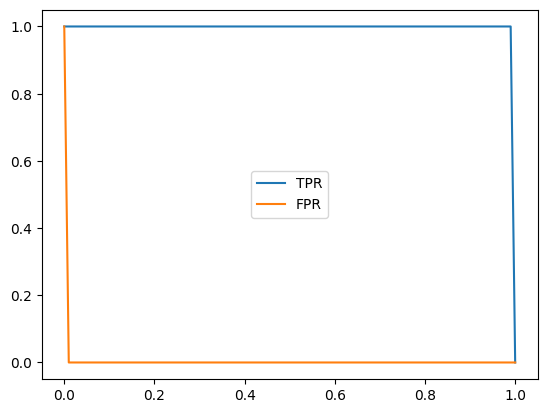

In [299]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

**Random model**

In [300]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_test))

In [301]:
((y_rand >= 0.5) == y_test).mean()

0.5025025025025025

In [302]:
def tpr_fpr_dataframe(y_test, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_test == 1)
        actual_negative = (y_test == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [303]:
df_rand = tpr_fpr_dataframe(y_test, y_rand)

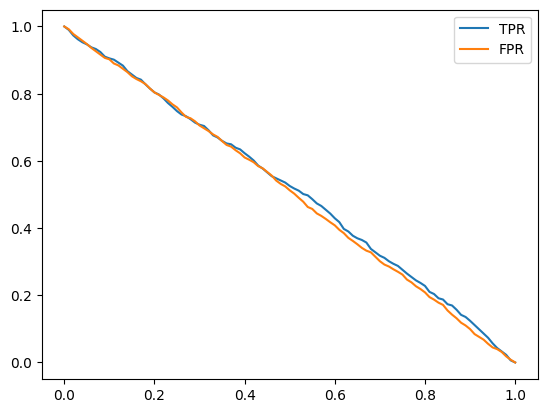

In [304]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

**Ideal model**

In [305]:
num_neg = (y_test == 0).sum()
num_pos = (y_test == 1).sum()
num_neg, num_pos

(1208, 790)

In [306]:

y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

y_ideal_pred = np.linspace(0, 1, len(y_test))

In [307]:
1 - y_test.mean()

0.6046046046046045

In [308]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)

0.8788788788788788

In [309]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,790,1208,0,0,1.000000,1.000000
10,0.1,790,1008,0,200,1.000000,0.834437
20,0.2,790,808,0,400,1.000000,0.668874
30,0.3,790,608,0,600,1.000000,0.503311
40,0.4,790,409,0,799,1.000000,0.338576
50,0.5,790,209,0,999,1.000000,0.173013
60,0.6,790,9,0,1199,1.000000,0.007450
70,0.7,600,0,190,1208,0.759494,0.000000
80,0.8,400,0,390,1208,0.506329,0.000000
90,0.9,200,0,590,1208,0.253165,0.000000


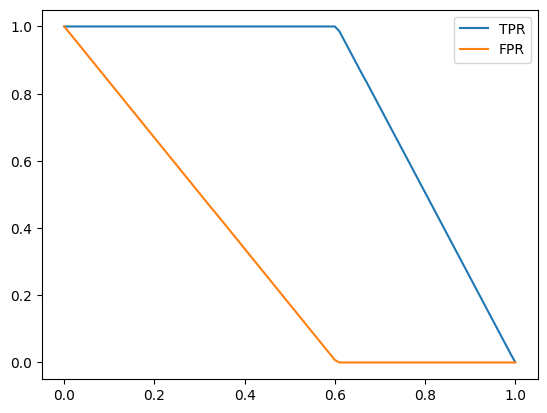

In [310]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

**Putting everything together**

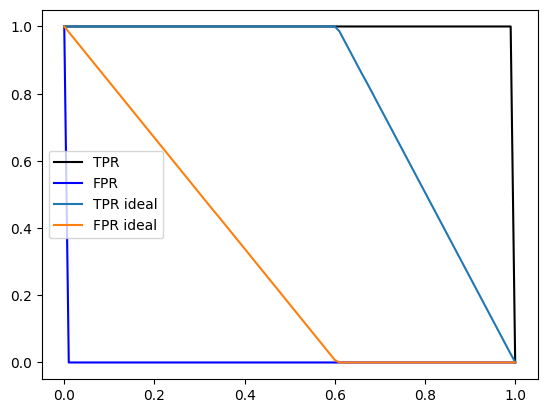

In [311]:
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

# plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
# plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

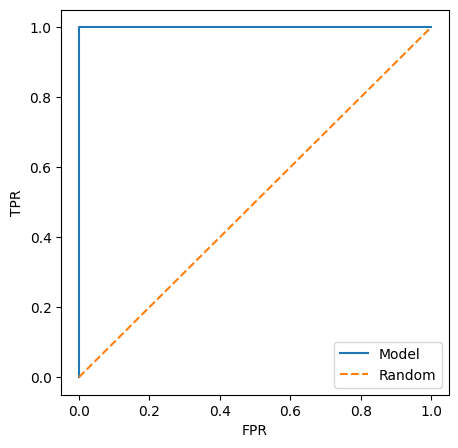

In [312]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [223]:
from sklearn.metrics import roc_curve

In [313]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

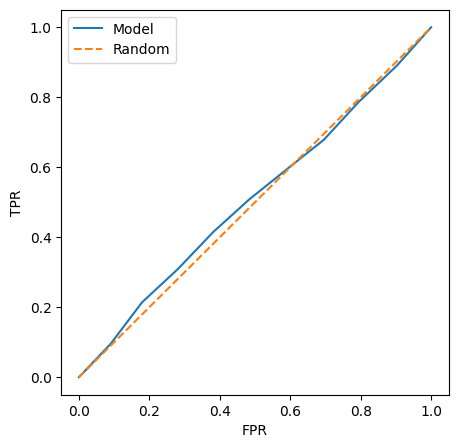

In [225]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

**ROC AUC CURVE**

In [226]:
from sklearn.metrics import auc

In [227]:
auc(fpr, tpr)

0.5091729814190857

In [228]:
auc(df_scores.fpr, df_scores.tpr)

0.5167470456938915

In [229]:
auc(df_ideal.fpr, df_ideal.tpr)

0.9999480195986905

In [314]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc(fpr, tpr)

1.0

In [231]:
from sklearn.metrics import roc_auc_score

In [315]:
roc_auc_score(y_test, y_pred)

1.0

In [316]:
neg = y_pred[y_test == 0]
pos = y_pred[y_test == 1]

In [234]:
import random

In [317]:
n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

1.0

In [318]:
n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

(pos[pos_ind] > neg[neg_ind]).mean()

1.0

### **Save and load the model**  
No regularization was done in this model

In [319]:
import pickle

In [320]:
output_file = 'model.bin'
with open(output_file, "wb") as f_out:
    pickle.dump((dv,model), f_out)

In [321]:
# load the model
output_file = 'model.bin'
with open(output_file, "rb") as f_in:
    (dv2,model2) = pickle.load(f_in)

In [322]:
dv2

DictVectorizer(sparse=False)

In [323]:
model2

LogisticRegression()

In [344]:
sample_employee ={
    "POSITION":                 "Software Development Engineer",
    "PLACE":                           "Hyderabad/Secunderabad",
    "DEPARTMENT":             "Software Development Department",
    "WORK_LIFE_BALANCE":                                  1.0,
    "SKILL_DEVELOPMENT":                                  2.0,
    "SALARY_AND_BENEFITS":                                5.0,
    "JOB_SECURITY":                                       1.0,
    "CAREER_GROWTH":                                      3.0,
    "WORK_SATISFACTION":                                  3.0,
}

In [345]:
X = dv2.transform([sample_employee])
model2.predict_proba(X)[0][1]

0.0017854063074879704

# **Serving the model**

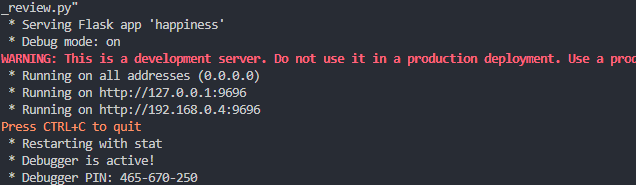

In [3]:
import requests
# copied all the libraries manually to the "sites-packages" directory in this venv

In [23]:
url = "http://127.0.0.1:9696/predict"

In [58]:
test_employee ={
    "POSITION":                 "Software Development Engineer",
    "PLACE":                           "Hyderabad/Secunderabad",
    "DEPARTMENT":             "Software Development Department",
    "WORK_LIFE_BALANCE":                                    4.0,
    "SKILL_DEVELOPMENT":                                    5.0,
    "SALARY_AND_BENEFITS":                                  5.0,
    "JOB_SECURITY":                                         1.0,
    "CAREER_GROWTH":                                        5.0,
    "WORK_SATISFACTION":                                    3.0
}

In [59]:
response = requests.post(url,json=test_employee)
response.json()

{'happiness': 0.994675400498832, 'is_happy': True}

In [28]:
response.json()

{'data': {'CAREER_GROWTH': 3.0,
  'DEPARTMENT': 'Software Development Department',
  'JOB_SECURITY': 1.0,
  'PLACE': 'Hyderabad/Secunderabad',
  'POSITION': 'Software Development Engineer',
  'SALARY_AND_BENEFITS': 5.0,
  'SKILL_DEVELOPMENT': 2.0,
  'WORK_LIFE_BALANCE': 1.0,
  'WORK_SATISFACTION': 3.0},
 'message': 'Data received'}

**Waitress**  
Gunicorn is for Linux; alternatives:  
a) Use Windows Linus Subsystem  
b) Use waitress  

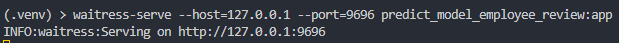

In [61]:
# now the api is serving in production
response = requests.post(url,json=test_employee)
response.json()

{'happiness': 0.994675400498832, 'is_happy': True}

**Docker**

In [62]:
# test for running from docker container
# now the api is serving in production
response = requests.post(url,json=test_employee)
response.json()

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=9696): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002D21B643A90>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))

After mapping the ports:  
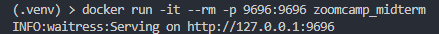

In [66]:
# After binding the port (it was exposed, but not mapped)
# now the api is serving in production
response = requests.post(url,json=test_employee)
response.json()

{'happiness': 0.994675400498832, 'is_happy': True}